# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [0]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [3]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

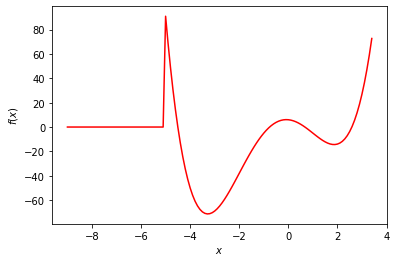

In [4]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The layer will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [5]:
import torch

H1 = 40 # number of hidden neurons
H2 = 20
H3 = 20

Niter = 5*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

999 5.766939640045166
1999 0.19630329310894012
2999 0.08856169879436493
3999 2.0907797813415527
4999 0.4588533341884613


Plot the training error as a function of the epoch

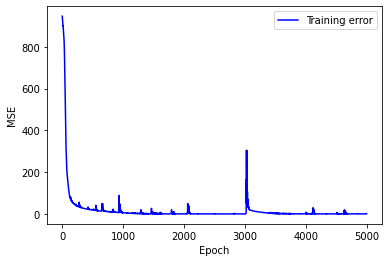

In [6]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

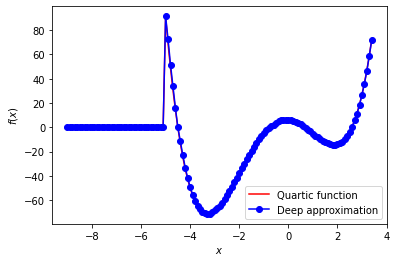

In [7]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

How many parameters?

In [0]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [9]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



Print all the parameters (just for seeing them)

In [10]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 1.6777],
        [ 0.2922],
        [ 0.0584],
        [-0.7530],
        [ 0.3562],
        [ 1.2374],
        [-0.5456],
        [-0.8156],
        [-0.7492],
        [ 1.5213],
        [ 0.2327],
        [ 0.4046],
        [-0.0251],
        [-0.1937],
        [ 0.3173],
        [ 1.3848],
        [ 0.4306],
        [ 1.0297],
        [ 0.4122],
        [ 0.5574],
        [-0.0622],
        [-0.2924],
        [-0.2832],
        [-0.6065],
        [-0.6760],
        [-0.3892],
        [ 0.1372],
        [ 0.0069],
        [ 1.3397],
        [-0.3696],
        [ 0.4114],
        [ 0.2620],
        [ 0.3055],
        [ 0.7568],
        [ 0.2138],
        [ 1.3959],
        [ 0.2140],
        [-0.1851],
        [ 0.4148],
        [ 1.1822]], requires_grad=True)
Parameter containing:
tensor([ 0.5241,  1.7991, -0.3265, -1.8481,  1.3032, -1.6226, -2.3152, -1.5423,
        -0.7625,  0.4980,  1.5373,  1.4793,  1.0932,  0.6373,  1.9489, -1.3366,
         1.3765

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [11]:
H1 = 5000 # number of hidden neurons

Niter = 20*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

999 96.6321792602539
1999 96.12133026123047
2999 95.78148651123047
3999 63.74628829956055
4999 48.1425895690918
5999 43.08442687988281
6999 35.33656311035156
7999 30.11851692199707
8999 26.221813201904297
9999 23.773839950561523
10999 21.97381019592285
11999 21.313339233398438
12999 35.50166320800781
13999 18.135656356811523
14999 16.78937530517578
15999 15.970320701599121
16999 23.048198699951172
17999 14.651721954345703
18999 15.026559829711914
19999 13.597122192382812


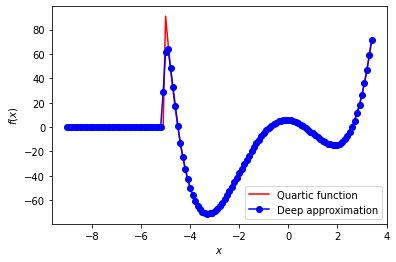

In [12]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [13]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 15001

